In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
spam = pd.read_csv('spam.csv', encoding='ISO-8859-1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
spam.shape

(5572, 5)

In [5]:
# data cleaning
# EDA
# text pre processing
# model building
# evaluation
# improvement

# data cleaning

In [6]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [7]:
spam.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [8]:
spam.sample()

,target,text
2116,ham,"It's that time of the week again, ryan"


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
spam['target'] = encoder.fit_transform(spam['target'])

In [11]:
spam.sample(3)

,target,text
3426,0,Haha okay... Today weekend leh...
1068,1,Someone U know has asked our dating service 2 ...
3076,0,There is no sense in my foot and penis.


In [12]:
spam.isna().sum()

target    0
text      0
dtype: int64

In [13]:
spam.duplicated().sum()

403

In [14]:
spam.drop_duplicates(keep='first', inplace=True)

In [15]:
spam.shape

(5169, 2)

# EDA (expotri data analysis)

In [16]:
spam.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

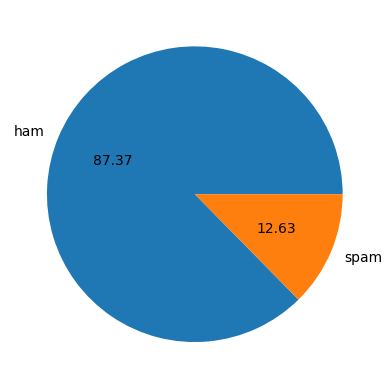

In [17]:
plt.pie(spam.target.value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [18]:
# no of characters
spam['text_len'] = spam.text.apply(len)

In [19]:
spam.head(2)

,target,text,text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [20]:
import nltk

In [21]:
# nltk.download()

In [22]:
spam.iloc[0].text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [23]:
# no of words
spam['text_words']=spam.text.apply(lambda x : len(nltk.word_tokenize(x)))
# spam.text.apply(lambda x : len(x.split()))

In [24]:
spam['text_sentence']=spam.text.apply(lambda x : len(nltk.sent_tokenize(x)))

In [25]:
spam.head()

,target,text,text_len,text_words,text_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
spam[['text_len','text_words','text_sentence']].describe()

,text_len,text_words,text_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
spam[spam.target == 0][['text_len','text_words','text_sentence']].describe()

,text_len,text_words,text_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
spam[spam.target == 1][['text_len','text_words','text_sentence']].describe()

,text_len,text_words,text_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='text_len', ylabel='Count'>

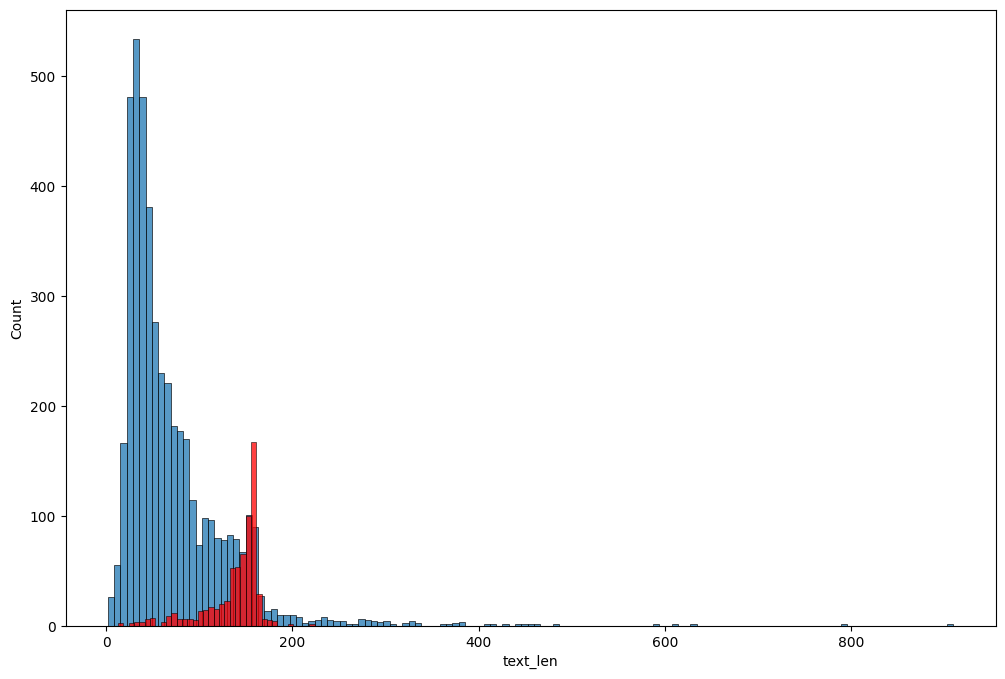

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(spam[spam.target == 0].text_len)
sns.histplot(spam[spam.target == 1].text_len,color='red')

<Axes: xlabel='text_words', ylabel='Count'>

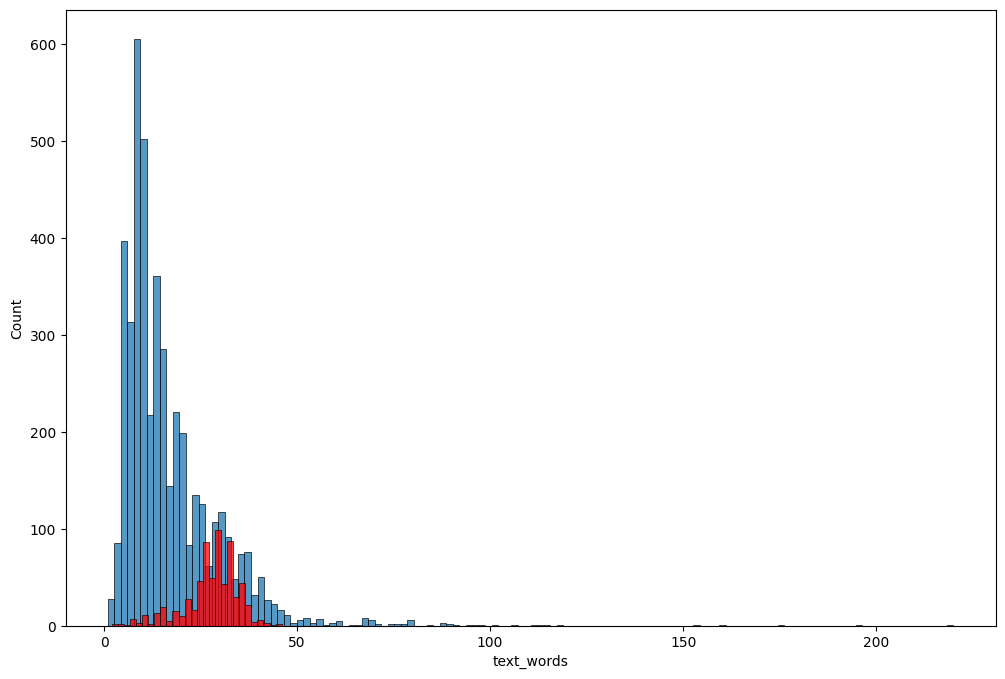

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(spam[spam.target == 0].text_words)
sns.histplot(spam[spam.target == 1].text_words,color='red')

<Axes: xlabel='text_sentence', ylabel='Count'>

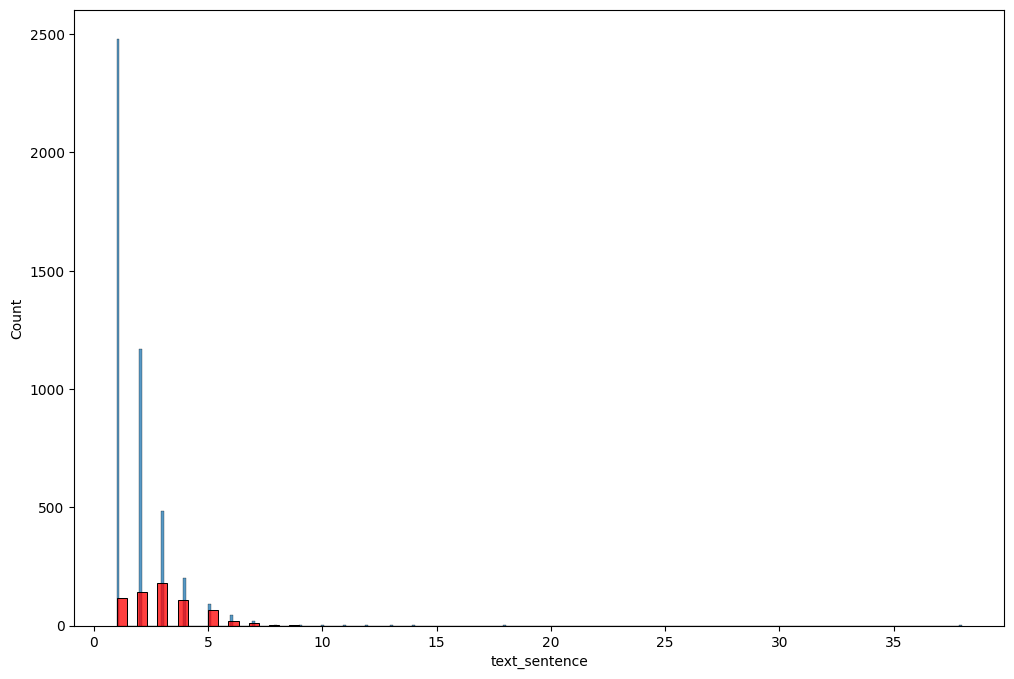

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(spam[spam.target == 0].text_sentence)
sns.histplot(spam[spam.target == 1].text_sentence,color='red')

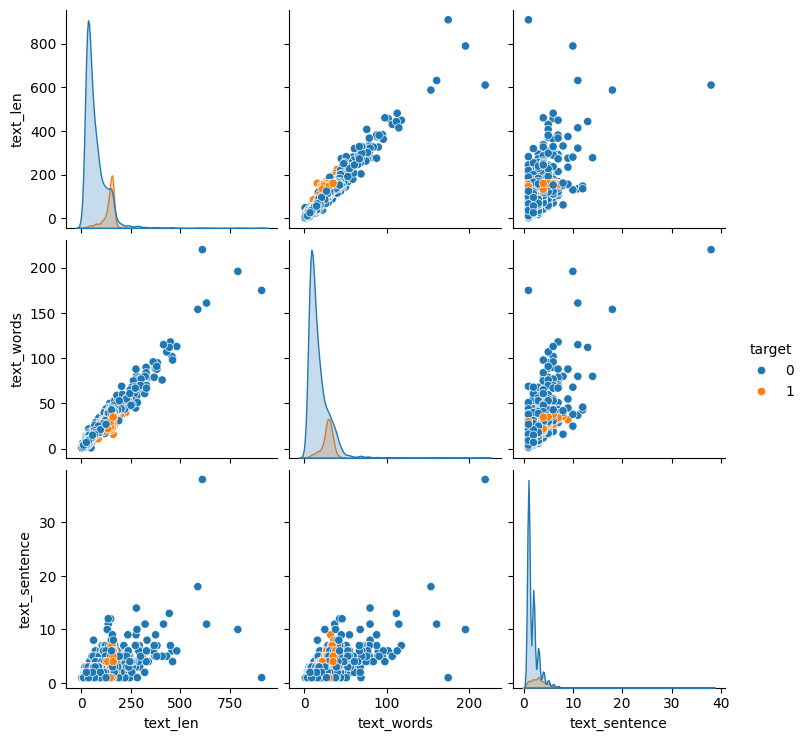

In [33]:
sns.pairplot(spam,hue='target')

In [34]:
corr = spam.corr(numeric_only=True)
corr

,target,text_len,text_words,text_sentence
target,1.000000,0.384717,0.262912,0.263939
text_len,0.384717,1.000000,0.965760,0.624139
text_words,0.262912,0.965760,1.000000,0.679971
text_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

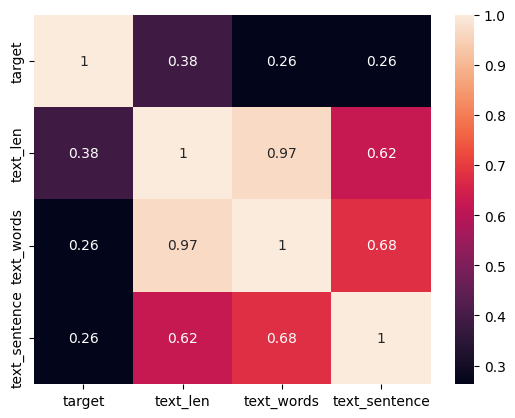

In [35]:
sns.heatmap(corr,annot=True)

# Data Pre processing

In [36]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
def text_tran(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    text = [t for t in text if t.isalnum()]
    text = [t for t in text if t not in stopwords.words('english') and t not in string.punctuation]
    text = [ps.stem(t) for t in text]
    
    return " ".join(text)

In [40]:
text_tran(spam.text[10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [41]:
spam['tran_text'] = spam.text.apply(text_tran)

In [42]:
spam.head(3)

,target,text,text_len,text_words,text_sentence,tran_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [43]:
from wordcloud import WordCloud
wc = WordCloud(
    width=500,
    height=500,
    min_font_size=10,
    background_color='white'
)

In [44]:
spam_wc = wc.generate(
    spam[spam.target == 1].tran_text.str.cat(sep=" ")
)

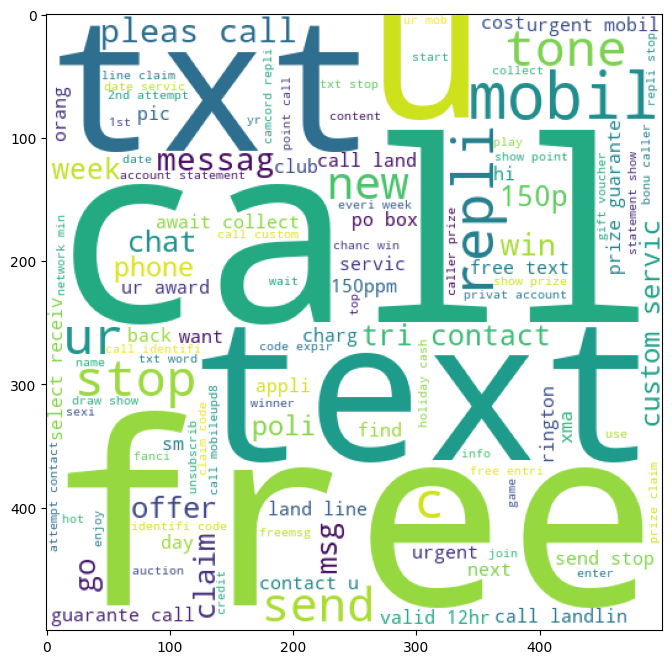

In [45]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(
    spam[spam.target == 0].tran_text.str.cat(sep=" ")
)

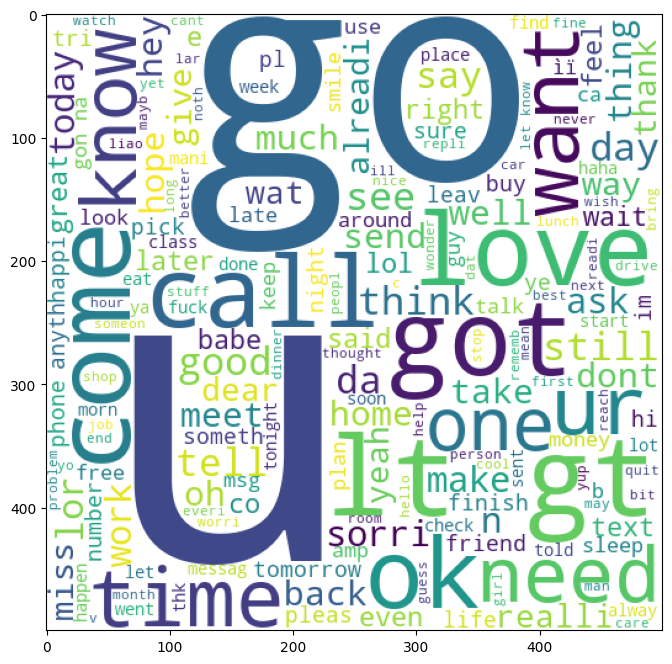

In [47]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [48]:
word_len = []
for tran_text in spam[spam.target==1].tran_text.tolist():
    word_len.extend([word for word in tran_text.split()])

In [49]:
len(word_len)

9939

In [50]:
from collections import Counter

In [51]:
Counter(word_len)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [52]:
newDfData = Counter(word_len).most_common(30)

In [53]:
spam_word_count = pd.DataFrame(newDfData)

In [54]:
spam_word_count.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


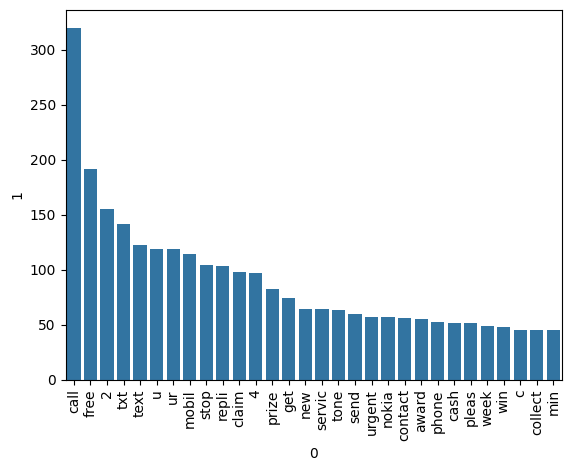

In [55]:
sns.barplot(spam_word_count,x=spam_word_count[0],y=spam_word_count[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
word_len_ham = []
for tran_text in spam[spam.target==0].tran_text.tolist():
    word_len_ham.extend([word for word in tran_text.split()])

In [57]:
len(word_len_ham)

35404

In [58]:
ham_df_data = Counter(word_len_ham).most_common(30)

In [59]:
ham_word_count = pd.DataFrame(ham_df_data)

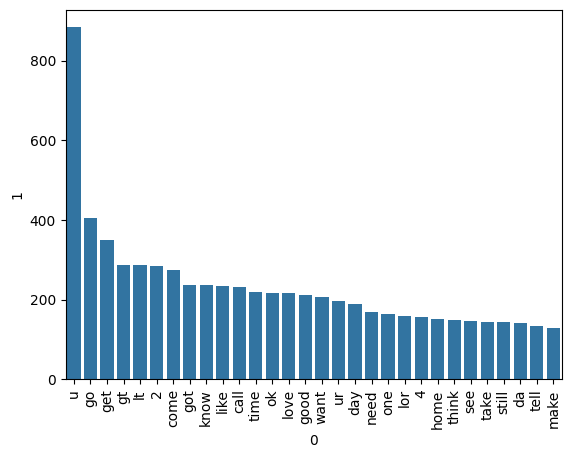

In [60]:
sns.barplot(ham_word_count,x=ham_word_count[0],y=ham_word_count[1])
plt.xticks(rotation='vertical')
plt.show()

# model building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [62]:
x = tfidf.fit_transform(spam.tran_text).toarray()

In [63]:
x.shape

(5169, 6708)

In [64]:
y = spam.target.values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(x_train, y_train)
gnb_y_pred = gnb.predict(x_test)
print(accuracy_score(y_test, gnb_y_pred))
print(confusion_matrix(y_test, gnb_y_pred))
print(precision_score(y_test, gnb_y_pred))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [70]:
mnb.fit(x_train, y_train)
mnb_y_pred = mnb.predict(x_test)
print(accuracy_score(y_test, mnb_y_pred))
print(confusion_matrix(y_test, mnb_y_pred))
print(precision_score(y_test, mnb_y_pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [71]:
bnb.fit(x_train, y_train)
bnb_y_pred = bnb.predict(x_test)
print(accuracy_score(y_test, bnb_y_pred))
print(confusion_matrix(y_test, bnb_y_pred))
print(precision_score(y_test, bnb_y_pred))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
pip install xgboost

In [ ]:
 from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)


In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [72]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# model testing 

In [73]:
def text_tran(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    text = [t for t in text if t.isalnum()]
    text = [t for t in text if t not in stopwords.words('english') and t not in string.punctuation]
    text = [ps.stem(t) for t in text]
    
    return " ".join(text)

In [74]:
# use these tfidf, mnb

# process

In [82]:
email_input = input('email message: ')

# preprocess
trans_msg = text_tran(email_input)

# vectorize
vector_input = tfidf.transform([trans_msg])

# predict
result = mnb.predict(vector_input)[0]

# display
print("*"*20)
print("not sapm" if result == 0 else "spam")


email message:  WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


********************
spam
